In [1]:
from numpy.random import randint
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten
from keras.datasets.mnist import load_data
from keras.layers import Dropout
from keras.optimizers import Adam

In [2]:
def get_images_ready(n_classes=10):
  (x_train, y_train), (_, _) = load_data()
  x = np.expand_dims(x_train, axis=-1)
  x = x.astype('float32')
  x = x/255.
  print(x.shape, y_train)
  return [x, y_train]

In [3]:
num_images = 120
def select_subset_images(dataset, n_samples=num_images, n_classes=10):
  x, y = dataset
  x_list, y_list = list(), list()
  n_per_class = int(n_samples/n_classes)
  for i in range(n_classes):
    x_with_class = x[y==i]
    ix = randint(0, len(x_with_class), n_per_class)
    [x_list.append(x_with_class[j]) for j in ix]
    [y_list.append(i) for j in ix]
  return np.asarray(x_list), np.asarray(y_list)

In [4]:
dataset = get_images_ready()
x, y = select_subset_images(dataset)

(60000, 28, 28, 1) [5 0 4 ... 5 6 8]


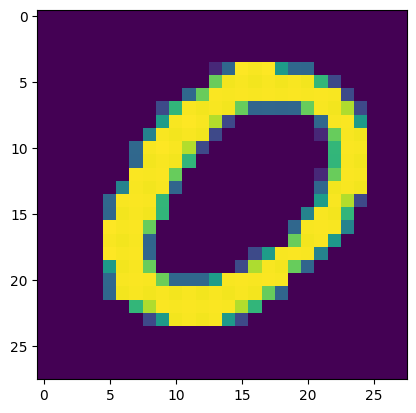

In [5]:
i = randint(0, x.shape[0])
plt.imshow(x[i])

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.16, random_state=42)

In [7]:
print('x_train : ',x_train.shape,'\nx_test : ',x_test.shape)

x_train :  (100, 28, 28, 1) 
x_test :  (20, 28, 28, 1)


In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(2,2), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', activation='relu'))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [9]:
opt = Adam(learning_rate=0.0002, beta_1=0.5)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 113162 (442.04 KB)
Trainable params: 11316

In [10]:
history = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_test, y_test), verbose=1)

model.save('cnn_model_for_mnist_100epochs.h5')

Epoch 1/100
2/2 [==============================] - 2s 391ms/step - loss: 2.2731 - accuracy: 0.1100 - val_loss: 2.2766 - val_accuracy: 0.1500
Epoch 2/100
2/2 [==============================] - 0s 108ms/step - loss: 2.2669 - accuracy: 0.1500 - val_loss: 2.2582 - val_accuracy: 0.1500
Epoch 3/100
2/2 [==============================] - 0s 105ms/step - loss: 2.2116 - accuracy: 0.2800 - val_loss: 2.2385 - val_accuracy: 0.2000
Epoch 4/100
2/2 [==============================] - 0s 77ms/step - loss: 2.1778 - accuracy: 0.3200 - val_loss: 2.2163 - val_accuracy: 0.2000
Epoch 5/100
2/2 [==============================] - 0s 121ms/step - loss: 2.1620 - accuracy: 0.3300 - val_loss: 2.1933 - val_accuracy: 0.3000
Epoch 6/100
2/2 [==============================] - 0s 94ms/step - loss: 2.1049 - accuracy: 0.4600 - val_loss: 2.1657 - val_accuracy: 0.3000
Epoch 7/100
2/2 [==============================] - 0s 98ms/step - loss: 2.0805 - accuracy: 0.4500 - val_loss: 2.1374 - val_accuracy: 0.3000
Epoch 8/100
2/2 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


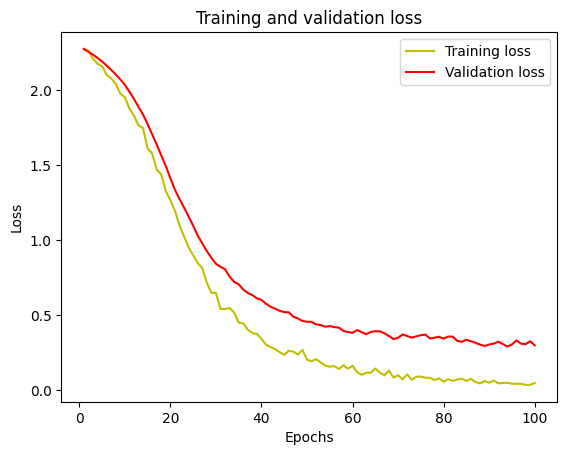

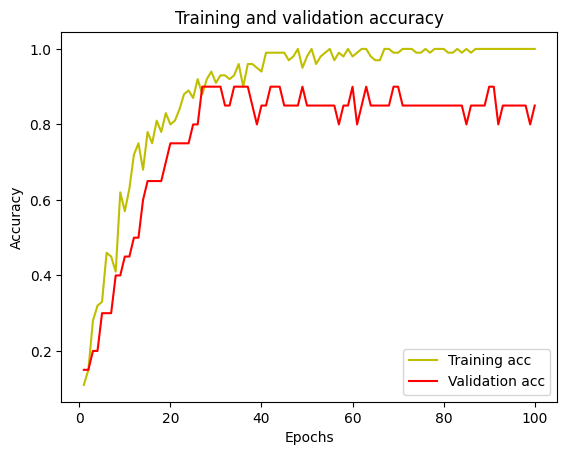

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Test Accuracy: 79.950%
313/313 [==============================] - 2s 5ms/step


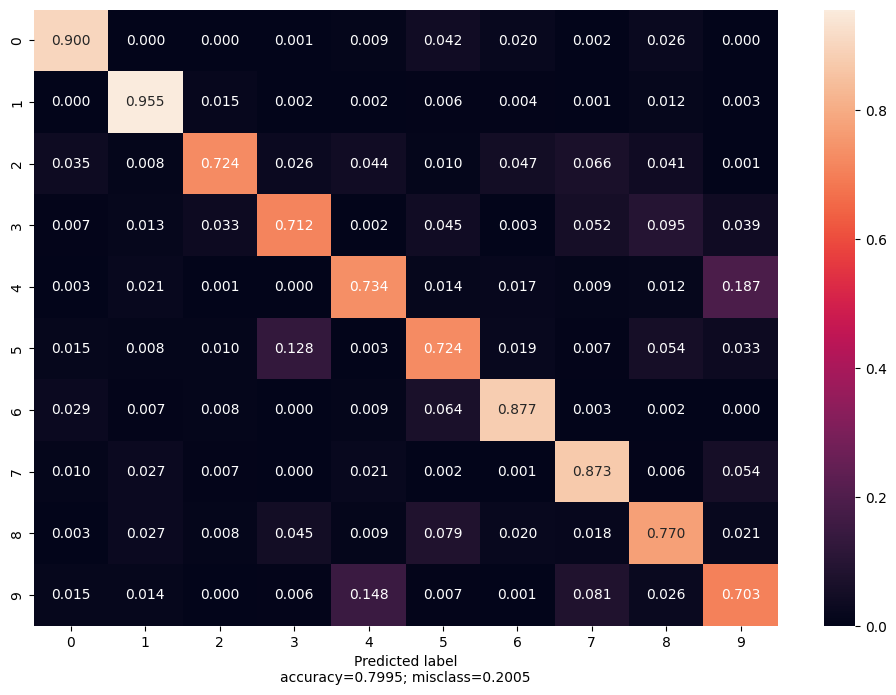

In [12]:
from keras.models import load_model
# load the model
my_model = load_model('cnn_model_for_mnist_100epochs.h5')

# load the dataset
(_, _), (test_X, test_y) = load_data()

# expand to 3d, e.g. add channels
test_X = np.expand_dims(test_X, axis=-1)

# convert from ints to floats
test_X = test_X.astype('float32')

# scale from [0,255] to [-1,1]
test_X = test_X /255.

# evaluate the model
_, test_acc = my_model.evaluate(test_X, test_y, verbose=0)
print('Test Accuracy: %.3f%%' % (test_acc * 100))


# Predicting the Test set results
y_pred_test = model.predict(test_X)
prediction_test = np.argmax(y_pred_test, axis=1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y, prediction_test)
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(12, 8))
sns.heatmap(cm, fmt=".3f", annot=True)
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()